# Learning Analytics
### Panagiotis Maroulidis A.M.: 37
### Georgina Skraparli A.M.: 31

## Analysis

**Paper used:** Amrieh, E. A., Hamtini, T., & Aljarah, I. (2016). Mining Educational Data to Predict Student’s academic Performance using Ensemble Methods. International Journal of Database Theory and Application, 9(8), 119-136.

**Dataset:** datasets_436_920_xAPI-Edu-Data.csv (https://www.kaggle.com/aljarah/xAPI-Edu-Data)

In this paper, there is a proposal about a new student’s performance prediction model based on data mining techniques with the 10 filter-based highest ranked features in which new data attributes/features were included that are called student’s behavioral features (student's interaction with e-learning management system). The classifiers that were used are: Artificial Neural Network, Naïve Bayesian and Decision tree with ensemble methods (Bagging, Boosting and Random Forest (RF)). According to the paper's results there is a strong relationship between learner’s behaviors and their academic achievement.

There aren't any missing values in the dataset.

In the following analysis we used the following techniques:
- **Correlation** between 10 highest ranked features used in the paper and the student's academic achievement
- **(Multiple) Linear Regression** for predicting the student's academic achievement from student’s behavioral features 
- **Decision Tree** with student’s behavioral features as training variables   
- **Decision Tree with Boosting (Adaboost)** with student’s behavioral features as training variables

**Import libraries**

In [8]:
import numpy as np
import scipy as sp
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import tree

**Read file**

In [9]:
# Read from file
df = pd.read_csv("datasets_436_920_xAPI-Edu-Data.csv") 

**Convert categorical data to numbers**  
<br/>(Only those from 10 highest ranked features used in the paper and the student's academic achievement)

In [10]:
# Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Bad’,’Good’)
df = df.replace({'ParentschoolSatisfaction': {'Bad': 0, 'Good': 1}})

# Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
# Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)
# with label encoding technique
df["PlaceofBirth"] = df["PlaceofBirth"].astype('category')
df["PlaceofBirth"]= df["PlaceofBirth"].cat.codes

# Relation- Parent responsible for student (nominal:’Mum’,’Father’)
df = df.replace({'Relation': {'Mum': 0, 'Father': 1}})

# Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
# Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)
# with label encoding technique
df["NationalITy"] = df["NationalITy"].astype('category')
df["NationalITy"]= df["NationalITy"].cat.codes

#  Parent Answering Survey- parent answered the surveys which are provided from school or not
# (nominal:’Yes’,’No’)
df = df.replace({'ParentAnsweringSurvey': {'No': 0, 'Yes': 1}})

# Student Absence Days-the number of absence days for each student (nominal: Under-7, Above-7)
df = df.replace({'StudentAbsenceDays': {'Under-7': 0, 'Above-7': 1}})

# Class- student's academic achievement (nominal: L, M, H)
df = df.replace({'Class': {'L': 0, 'M': 1, 'H': 2}})

## Correlation
Correlation between 10 highest ranked features used in the paper and the student's academic achievement

In [11]:
# Method = pearson : standard correlation coefficient
df.corr()

,NationalITy,PlaceofBirth,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
NationalITy,1.000000,0.786798,-0.003212,0.111533,0.028793,0.062827,-0.063386,0.079380,-0.001701,-0.157116,0.094640
PlaceofBirth,0.786798,1.000000,-0.031632,0.077986,0.033798,0.078636,0.006262,0.040887,-0.094594,-0.134554,0.096571
Relation,-0.003212,-0.031632,1.000000,-0.364237,-0.360240,-0.339505,-0.026720,-0.163811,-0.287698,0.219687,-0.401142
raisedhands,0.111533,0.077986,-0.364237,1.000000,0.691572,0.643918,0.339386,0.316570,0.297015,-0.463882,0.646298
VisITedResources,0.028793,0.033798,-0.360240,0.691572,1.000000,0.594500,0.243292,0.382472,0.363835,-0.499030,0.677094
AnnouncementsView,0.062827,0.078636,-0.339505,0.643918,0.594500,1.000000,0.417290,0.396357,0.298744,-0.312134,0.527370
Discussion,-0.063386,0.006262,-0.026720,0.339386,0.243292,0.417290,1.000000,0.232197,0.061104,-0.218778,0.308183
ParentAnsweringSurvey,0.079380,0.040887,-0.163811,0.316570,0.382472,0.396357,0.232197,1.000000,0.539875,-0.261152,0.435495
ParentschoolSatisfaction,-0.001701,-0.094594,-0.287698,0.297015,0.363835,0.298744,0.061104,0.539875,1.000000,-0.228385,0.375901
StudentAbsenceDays,-0.157116,-0.134554,0.219687,-0.463882,-0.499030,-0.312134,-0.218778,-0.261152,-0.228385,1.000000,-0.671312


As we can see the order from strongest to weakest correlation with Class (student's academic achievement) is: <br/>
1) VisITedResources (0.677094) belongs to behavioral features<br/>
2) StudentAbsenceDays (-0.671312) <br/> 
3) raisedhands (0.646298) belongs to behavioral features<br/>
4) AnnouncementsView (0.527370) belongs to behavioral features<br/>
5) ParentAnsweringSurvey (0.435495) <br/>
6) Relation (-0.401142) <br/>
7) ParentschoolSatisfaction (0.375901) <br/> 
8) Discussion (0.308183) belongs to behavioral features<br/>
9) PlaceifBirth (0.096571) <br/>
10) NationaliTy (0.094640) <br/>

## Linear Regression
Regression line for predicting student's academic achievement from student’s behavioral features

## Decision Tree
Decision tree with student’s behavioral features as training variables

**Data normalization**
<br/>(student’s behavioral features and student's academic achievement)

In [12]:
# Normalize function
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return dataNorm

# Behavioral features
df['Discussion']= normalize(df['Discussion'])
df['VisITedResources'] = normalize(df['VisITedResources'])
df['raisedhands'] = normalize(df['raisedhands'])
df['AnnouncementsView'] = normalize(df['AnnouncementsView'])

**Create training and feature**

In [13]:
feature_cols = ['Discussion','VisITedResources', 'raisedhands', 'AnnouncementsView']
X = df[feature_cols]
y = df['Class']

**Split data**

In [14]:
#By default, the test_size is 25% and train_size is 75%
X_train, X_test, y_train, y_test = train_test_split(X,y) 

**Decision Tree**

In [25]:
parameters = {'max_depth':range(3,20)}
# Using GridSearchCV for optimizing parameters
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, error_score=np.nan, iid=False)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
print ("Mean cross-validated score of the best_estimator:",clf.best_score_)
print ("Τhe optimized maximum depth of the tree with 5- fold cross validation:", clf.best_params_) 

Mean cross-validated score of the best_estimator: 0.6251570884023132
Τhe optimized maximum depth of the tree with 5- fold cross validation: {'max_depth': 12}


**Evaluation Measures**

In [23]:
y_pred = clf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred, average="macro"))    
print("Precision: ",precision_score(y_test, y_pred, average="macro"))
print("F-measure: ",f1_score(y_test, y_pred, average="macro"))

Accuracy:  0.6333333333333333
Recall:  0.6321908349026993
Precision:  0.6384479717813051
F-measure:  0.6330836740672806


**Tree model image**

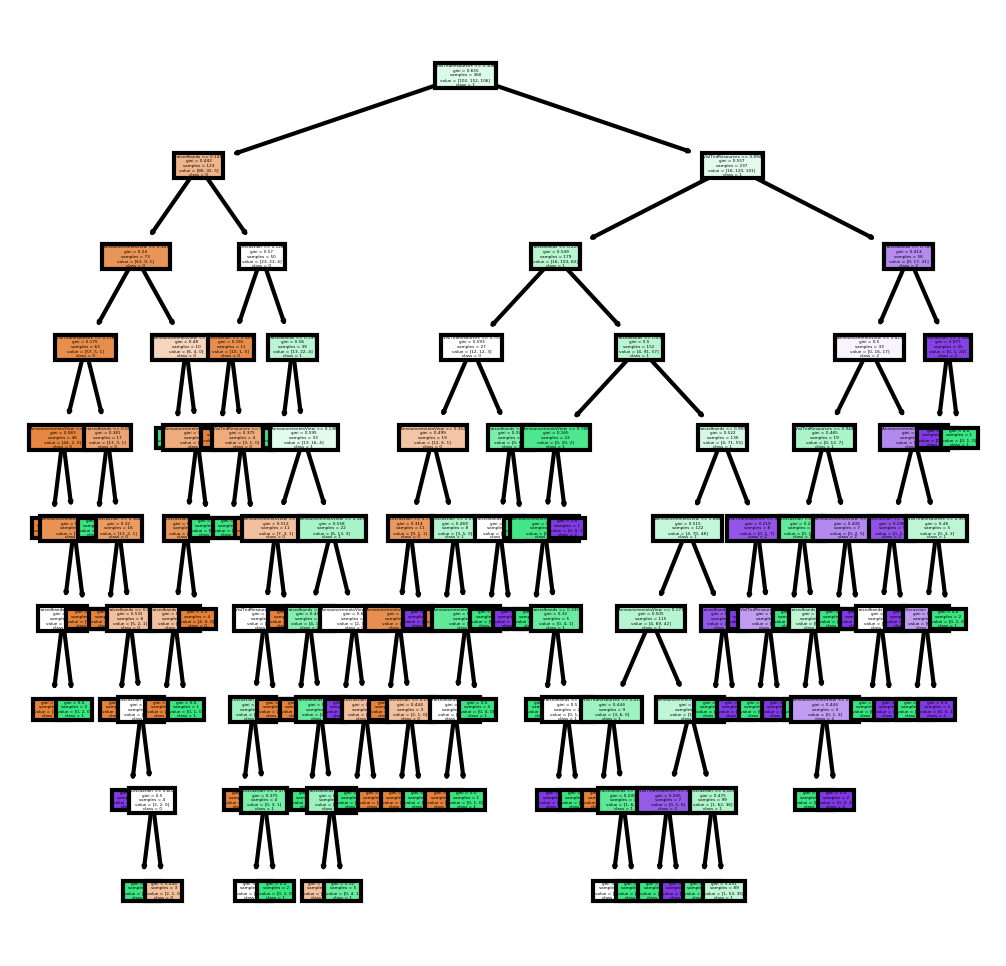

In [22]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree_model,
               feature_names = feature_cols, 
               class_names= ['0', '1','2'],
               filled = True);
fig.savefig('SimpleDT.png')

**Conclusions**
<br/> The results of decision tree's evaluation measures, in which only the student’s behavioral features are used, are better than using the 10 highest ranked features without behavioral features and worse than using all of the 10 highest ranked features as presented in the paper.
<br/>Paper's results:
![title](DTpaper.png)

**Decision Tree with Boosting (Adaboost)** 

**Evaluation Measures**

**Tree model image**

**Conclusions**

## Final Conclusions